In [2]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import maxnorm

Using TensorFlow backend.


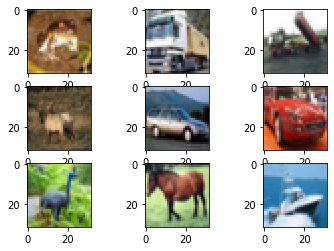

In [3]:
### 이미지 확인
import matplotlib.pyplot as plt
from PIL import Image 

### CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(Image.fromarray(x_train[i])) 

In [4]:
### 랜덤 시드 설정
rnd_seed = 3
np.random.seed(rnd_seed)

### 하이퍼 파라메터
width = 32
height = 32
channel = 3
dorpout_val = 0

### CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 데이터 정규화: 0~255 값을 0~1로 변경
#x_train = x_train.reshape(50000, width, height, 3).astype('float32') / 255.0
#x_test = x_test.reshape(10000, width, height, 3).astype('float32') / 255.0
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### 원-핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### 모델 생성
model = Sequential()
# first Conv layers
model.add(Conv2D(32,(3,3), input_shape=(width, height, channel), activation='relu', padding='same'))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dorpout_val))
# Second Conv layers
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dorpout_val))
# Third Conv layers
model.add(Conv2D(96,(3,3), activation='relu', padding='same'))
model.add(Conv2D(96,(3,3), activation='relu', padding='same'))
model.add(Conv2D(96,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(dorpout_val))
# Fully Connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(dorpout_val))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(dorpout_val))
model.add(Dense(num_classes, activation='softmax'))

W0805 13:52:30.431600 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 13:52:30.730293 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 13:52:30.870780 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 13:52:31.057771 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [6]:
### 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

W0805 13:52:31.227285 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 13:52:31.250280 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
### 모델 학습
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


W0805 13:52:31.437216 11952 deprecation.py:323] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 13:52:31.525197 11952 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 30s 593us/step - loss: 1.6025 - acc: 0.4023 - val_loss: 1.3104 - val_acc: 0.5216
Epoch 2/10
50000/50000 [==============================] - 16s 324us/step - loss: 1.1307 - acc: 0.5952 - val_loss: 1.0400 - val_acc: 0.6314
Epoch 3/10
50000/50000 [==============================] - 16s 327us/step - loss: 0.8864 - acc: 0.6851 - val_loss: 0.9134 - val_acc: 0.6815
Epoch 4/10
50000/50000 [==============================] - 17s 334us/step - loss: 0.7012 - acc: 0.7548 - val_loss: 0.8197 - val_acc: 0.7256
Epoch 5/10
50000/50000 [==============================] - 17s 333us/step - loss: 0.5540 - acc: 0.8036 - val_loss: 0.8209 - val_acc: 0.7238
Epoch 6/10
50000/50000 [==============================] - 17s 332us/step - loss: 0.4028 - acc: 0.8589 - val_loss: 0.7924 - val_acc: 0.7483
Epoch 7/10
50000/50000 [==============================] - 17s 345us/step - loss: 0.2577 - acc: 0.9106 - val_loss: 0.

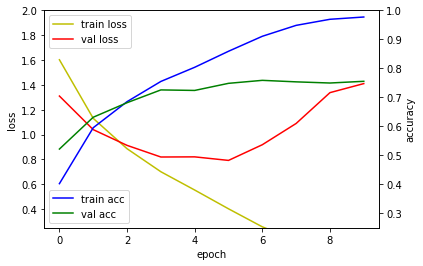

In [8]:
### 학습과정 확인
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.25, 2.0])


acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.25, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
### 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

In [ ]:
### 모델 사용
yhat_test = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5



plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row * plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]): # ==를 !=로 바꾸면 정답인 이미지를 표시해줌.
        i += 1
        continue
        
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height, channel))
    sub_plt_title = 'R: '+ str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    #Image.fromarray(x_train[i]
    i+=1
    cnt += 1
    
plt.show()

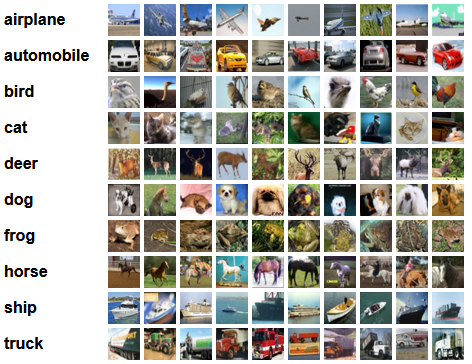

# 모델 1
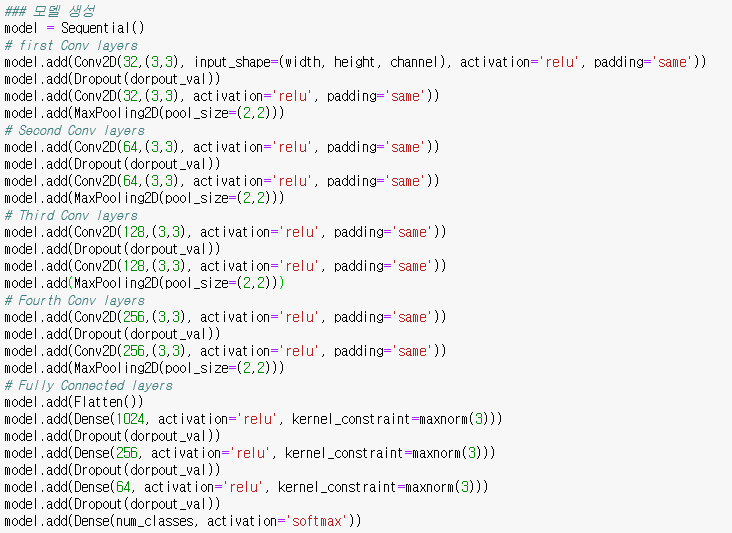
## evaluation loss and metrics ##
[0.7765956443786621, 0.74]